In [26]:
import cv2
import os
from marker_detection import MarkerDetection
from localization import Localization
import yaml

In [27]:
%reload_ext autoreload
%autoreload 2

In [28]:
frames = ["image.jpeg", "image2.jpeg", "image3.jpeg", "image4.jpeg", "image5.jpeg"]
# frames = ["image5.jpeg"]
frames = ["x_302_y_0.png", "x_302_y_445.png", "x_n301_y_0.png"]

config_path = os.path.join("..", "..", "..", "configs", "lab2", "config.yaml")
with open(config_path, "r") as file:
    config = yaml.safe_load(file)
m = MarkerDetection(config=config)
l = Localization(config=config)

Marker IDs: []
Marker Sizes: []
Distances: []
Corners: []
Marker IDs: [47]
Marker Sizes: [20.5]
Distances: [179.8723614883511]
Corners: [array([[468., 189.],
       [439., 187.],
       [430., 159.],
       [458., 162.]], dtype=float32)]
Marker IDs: [47, 18]
Marker Sizes: [20.5, 27.5]
Distances: [179.8723614883511, 152.09385120794678]
Corners: [array([[468., 189.],
       [439., 187.],
       [430., 159.],
       [458., 162.]], dtype=float32), array([[316., 182.],
       [262., 180.],
       [265., 139.],
       [317., 141.]], dtype=float32)]


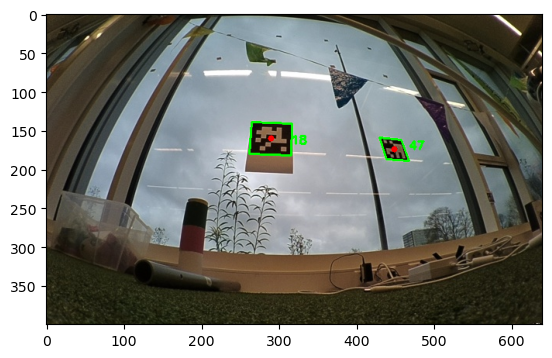

Landmarks: [[421.5 -97.   92.5]
 [421.5  -5.3  94.7]]
Marker IDs: [47, 18]
Distances: [179.87236149 152.09385121]
Initial guess: [-267.79400691   17.54183258]
Optimization result:      message: `gtol` termination condition is satisfied.
     success: True
      status: 1
         fun: [ 0.000e+00  0.000e+00]
           x: [ 3.027e+02  1.377e+00]
        cost: 0.0
         jac: [[-6.606e-01  5.469e-01]
               [-7.813e-01  4.390e-02]]
        grad: [ 0.000e+00  0.000e+00]
  optimality: 0.0
 active_mask: [ 0.000e+00  0.000e+00]
        nfev: 8
        njev: 8
------------------------------
[302.67292635   1.37653682]
x_302_y_0.png
Marker IDs: [67, 37]
Marker Sizes: [20.5, 20.5]
Distances: [205.31264584413384, 449.3024541939477]
Corners: [array([[483., 175.],
       [505., 180.],
       [513., 205.],
       [491., 202.]], dtype=float32), array([[103.,  55.],
       [ 95.,  55.],
       [110.,  47.],
       [113.,  49.]], dtype=float32)]


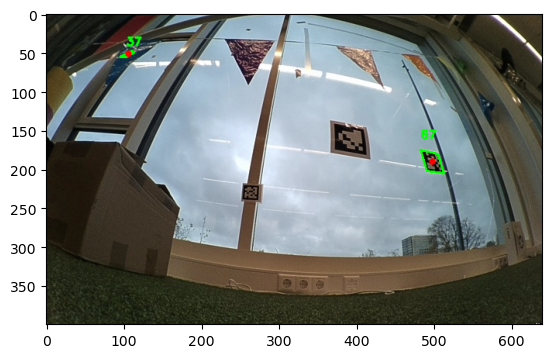

Landmarks: [[ 421.5  318.    91.6]
 [-502.   -95.5   94.7]]
Marker IDs: [67, 37]
Distances: [205.31264584 449.30245419]
Initial guess: [302.67292635   1.37653682]
Optimization result:      message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 1.891e+02  1.860e+02]
           x: [ 7.136e+01  1.612e+02]
        cost: 35179.9728559424
         jac: [[-8.877e-01 -3.975e-01]
               [ 9.025e-01  4.041e-01]]
        grad: [-3.253e-03  7.088e-03]
  optimality: 0.007088390767151509
 active_mask: [ 0.000e+00  0.000e+00]
        nfev: 16
        njev: 11
------------------------------
[ 71.36015221 161.23486022]
x_302_y_445.png
Marker IDs: [37]
Marker Sizes: [20.5]
Distances: [260.4558728737766]
Corners: [array([[227., 242.],
       [207., 243.],
       [210., 222.],
       [230., 220.]], dtype=float32)]
Marker IDs: [37]
Marker Sizes: [20.5]
Distances: [260.4558728737766]
Corners: [array([[227., 242.],
       [207., 243.],
       [210., 222

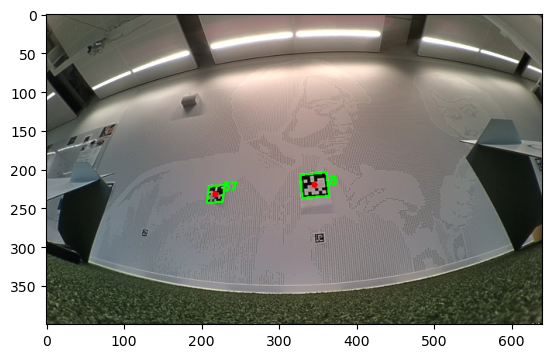

Landmarks: [[-502.   -95.5   94.7]
 [-502.     9.5  100.5]]
Marker IDs: [37, 8]
Distances: [260.45587287 234.70126538]
Initial guess: [ 71.36015221 161.23486022]
Optimization result:      message: `gtol` termination condition is satisfied.
     success: True
      status: 1
         fun: [ 9.227e-10  7.268e-10]
           x: [-2.903e+02  2.312e+01]
        cost: 6.897698122704902e-19
         jac: [[ 8.126e-01  4.554e-01]
               [ 9.018e-01  5.802e-02]]
        grad: [ 1.405e-09  4.624e-10]
  optimality: 1.4052269536056947e-09
 active_mask: [ 0.000e+00  0.000e+00]
        nfev: 6
        njev: 6
------------------------------
[-290.34228214   23.11779877]
x_n301_y_0.png


In [30]:
for f in frames:
    f_path = os.path.join("..", "..", "..", "assets", f)
    frame = cv2.imread(f_path)
    if frame is None:
        raise ValueError(f"Could not load image: {f_path}")
    tmp = m.detect(frame)
    location = l.triangulate(tmp)
    print("------------------------------")
    print(location)
    print(f)